Дубинин Михаил, 20215

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [139]:
data_train     = pd.read_csv('./Task5_test.csv')
data_test      = pd.read_csv('./Task5_test.csv')

In [140]:
data_train.head()

,Unnamed: 0,index,Y,X1,X2,X3,X4,X5,X6,X7,...,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120
0,0,1535,1.220765,0.539326,43.679088,20.926309,6.179238,-5.358717,1.731249,0.963347,...,4.405429,-1.904007,-27.283487,-27.438427,4.173234,-5.760453,9.757871,-3.191983,-44.780571,8.959113
1,1,4085,0.321220,1.317855,-52.162767,-20.674707,-7.343498,-6.081946,0.943064,0.166558,...,7.578385,-5.614340,-2.645981,-5.275813,3.443719,7.568027,-13.174991,-0.726145,-28.217882,-19.067210
2,2,2513,3.052882,-12.197226,-57.110203,17.861883,-37.173679,-0.808244,-0.836227,-0.376634,...,-12.563511,11.269800,54.711948,-12.364689,-4.803594,-0.759311,4.975279,12.103898,29.169132,-18.807811
3,3,359,0.893139,15.113375,32.492299,-11.156248,-19.879407,-10.014740,-10.483214,0.037949,...,-4.906042,5.712416,11.334077,-7.783005,1.574379,-18.266061,12.922255,-1.794103,-59.083551,-4.056153
4,4,3308,1.247242,18.576153,76.466490,10.083948,20.507711,7.230089,8.177727,1.429602,...,29.655519,-9.564759,-27.111919,-0.604557,-21.439480,-17.789510,-54.532363,1.998957,-23.205994,21.673565


In [141]:
data_test.head()

,Unnamed: 0,index,Y,X1,X2,X3,X4,X5,X6,X7,...,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120
0,0,1535,1.220765,0.539326,43.679088,20.926309,6.179238,-5.358717,1.731249,0.963347,...,4.405429,-1.904007,-27.283487,-27.438427,4.173234,-5.760453,9.757871,-3.191983,-44.780571,8.959113
1,1,4085,0.321220,1.317855,-52.162767,-20.674707,-7.343498,-6.081946,0.943064,0.166558,...,7.578385,-5.614340,-2.645981,-5.275813,3.443719,7.568027,-13.174991,-0.726145,-28.217882,-19.067210
2,2,2513,3.052882,-12.197226,-57.110203,17.861883,-37.173679,-0.808244,-0.836227,-0.376634,...,-12.563511,11.269800,54.711948,-12.364689,-4.803594,-0.759311,4.975279,12.103898,29.169132,-18.807811
3,3,359,0.893139,15.113375,32.492299,-11.156248,-19.879407,-10.014740,-10.483214,0.037949,...,-4.906042,5.712416,11.334077,-7.783005,1.574379,-18.266061,12.922255,-1.794103,-59.083551,-4.056153
4,4,3308,1.247242,18.576153,76.466490,10.083948,20.507711,7.230089,8.177727,1.429602,...,29.655519,-9.564759,-27.111919,-0.604557,-21.439480,-17.789510,-54.532363,1.998957,-23.205994,21.673565


In [142]:
Y_train = data_train['Y']
data_train = data_train.iloc[:,3:]

Y_test = data_test['Y']
data_test = data_test.iloc[:,3:]

In [143]:
data_train.isnull().any().any(), data_train.isna().any().any(), data_test.isnull().any().any(), data_test.isna().any().any(), (data_train.dtypes != 'float64').any(), (data_test.dtypes != 'float64').any() 

(False, False, False, False, False, False)

In [144]:
data_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120
0,0.539326,43.679088,20.926309,6.179238,-5.358717,1.731249,0.963347,7.525590,-11.848401,15.930232,...,4.405429,-1.904007,-27.283487,-27.438427,4.173234,-5.760453,9.757871,-3.191983,-44.780571,8.959113
1,1.317855,-52.162767,-20.674707,-7.343498,-6.081946,0.943064,0.166558,25.022729,-9.788747,22.966192,...,7.578385,-5.614340,-2.645981,-5.275813,3.443719,7.568027,-13.174991,-0.726145,-28.217882,-19.067210
2,-12.197226,-57.110203,17.861883,-37.173679,-0.808244,-0.836227,-0.376634,-4.643745,14.141997,29.089453,...,-12.563511,11.269800,54.711948,-12.364689,-4.803594,-0.759311,4.975279,12.103898,29.169132,-18.807811
3,15.113375,32.492299,-11.156248,-19.879407,-10.014740,-10.483214,0.037949,-17.061066,-6.053535,25.806585,...,-4.906042,5.712416,11.334077,-7.783005,1.574379,-18.266061,12.922255,-1.794103,-59.083551,-4.056153
4,18.576153,76.466490,10.083948,20.507711,7.230089,8.177727,1.429602,2.521708,17.783646,-59.753311,...,29.655519,-9.564759,-27.111919,-0.604557,-21.439480,-17.789510,-54.532363,1.998957,-23.205994,21.673565


In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

regr = RandomForestRegressor(max_depth=100, random_state=0) 
regr.fit(data_train, Y_train)

RandomForestRegressor(max_depth=100, random_state=0)

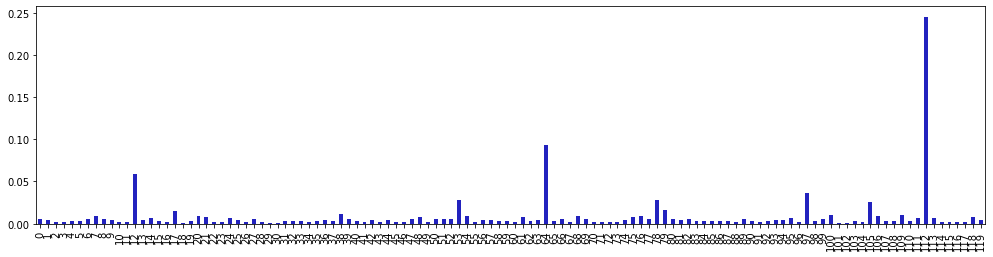

In [146]:
pd.Series(regr.feature_importances_).plot(kind  ='bar', color = '#2222be', figsize = (17, 4));

In [147]:
std = preprocessing.StandardScaler()
Xsc = pd.DataFrame(std.fit_transform(data_train, y = Y_train))

In [ ]:
regr_with_scaled_data = RandomForestRegressor(max_depth=100, random_state=0)
regr_with_scaled_data.fit(Xsc,Y_train)
pd.Series(regr_with_scaled_data.feature_importances_).plot(kind  ='bar', color = '#2222be', figsize = (17, 4));

как видно, что лесу плевать на нормализацию данных))

In [ ]:
rfr = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(random_state=42))
rfr.fit(data_train, Y_train)
importance_features = pd.Series(rfr[1].feature_importances_).sort_values(ascending = False)

In [ ]:
importance_features_sum = []
for i in importance_features.index:
    if len(importance_features_sum) == 0:
        importance_features_sum.append(importance_features[i])
    else:
        importance_features_sum.append(importance_features_sum[-1]+importance_features[i])
index = 0
for i in range(len(importance_features_sum) + 1):
  if(importance_features_sum[i] > 0.9):
    index = i
    break
important_indexes = importance_features.iloc[:index].index

оставили только те переменные, которые в сумме по важности дают 0.9

In [ ]:
important_indexes

In [ ]:
important_indexes_column_names = list(map(lambda x: 'X'+str(x), important_indexes))

In [ ]:
X_train = data_train[important_indexes_column_names]
X_test = data_test[important_indexes_column_names]

In [ ]:
forestRegressor = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(random_state=42))
forestRegressor.fit(X_train, Y_train)

In [ ]:
from sklearn.svm import SVR
svrRegressor = make_pipeline(preprocessing.StandardScaler(), SVR(gamma='auto'))
svrRegressor.fit(X_train, Y_train)

In [ ]:
from sklearn.linear_model import SGDRegressor
sgdrResressor = make_pipeline(preprocessing.StandardScaler(), SGDRegressor(random_state=42))
sgdrResressor.fit(X_train, Y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrResressor = make_pipeline(preprocessing.StandardScaler(), GradientBoostingRegressor(random_state=42))
gbrResressor.fit(X_train, Y_train)

In [ ]:
estimators=[('forest', forestRegressor),('svr', svrRegressor), ('sgdr', sgdrResressor), ('gbr', gbrResressor)]

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
model = VotingRegressor(estimators, n_jobs=-1, verbose=True)
model.fit(X_train, Y_train)

In [ ]:
model.score(X_test, Y_test)

In [ ]:
import sklearn.metrics as met
predict = model.predict(X_test)
met.mean_squared_error(Y_test, predict), met.r2_score(Y_test, predict)

In [ ]:
models = [forestRegressor, svrRegressor, sgdrResressor, gbrResressor]
for i in models:
    pred = i.predict(X_test)
    print(f'squared: {met.mean_squared_error(Y_test, pred)} mean: {met.r2_score(Y_test, pred)}')

In [ ]:
import joblib
joblib.dump(model, './my_model.pkl')